In [24]:
import requests 
import json
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
#Se realiza la llamada al API para la obtencion de datos

url = 'https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=48fcb848-220c-4af0-839b-4fd8ac812c0f'  
response = requests.get(url)
status = response.status_code
if status == requests.codes.ok: #Si la llamada al servicio regresa un 200 
    print("ok")
    print(response)
    response_decoded = response.content.decode("utf-8") #Se decodifica el contendido al estandar utf-8
    response_json = json.loads(response_decoded) # El contenido se trata de convertir en un formato JSON
    result = response_json["result"] 
    records  = result["records"]
    df = pd.json_normalize(records, max_level=0)

ok
<Response [200]>


In [10]:
df

,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,1,2016,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01T00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NA,-99.1402149999999,19.3803149998337,NA
1,2,2016,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01T00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NA,-99.1084029999999,19.3528589998337,NA
2,3,2016,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01T01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NA,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NA,-99.061321,19.3564509998336,NA
3,4,2016,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01T02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NA,-98.9763790000001,19.3316329998333,NA
4,5,2015,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01T02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NA,-99.1721889999999,19.387113999834,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2016,Febrero,2016-02-01 15:30:00,2016,Febrero,2016-02-01T19:10:52,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,CALLE 16,CALLE 16,AMPLIACIÓN PROGRESO NACIONAL,GUSTAVO A MADERO,NA,-99.1582389999999,19.5182899998329,NA
96,96,2016,Enero,2016-01-30 10:50:00,2016,Febrero,2016-02-01T19:12:51,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-8,UI-1CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,CALAMINA,FERROCARRIL HIDALGO,TRES ESTRELLAS,GUSTAVO A MADERO,NA,-99.1138999999999,19.4713529998332,NA
97,97,2014,Octubre,2014-10-24 12:30:00,2016,Febrero,2016-02-01T19:13:34,FRAUDE,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1CD,DELITO DE BAJO IMPACTO,AV. REVOLUCION,NICOLAS SLUTER,SANTA MARIA NONOALCO,BENITO JUAREZ,NA,-99.1872549999999,19.379477999834,NA
98,108,2016,Febrero,2016-02-01 18:15:00,2016,Febrero,2016-02-01T21:08:18,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN COYOACÁN,COY-1,UI-1CD,DELITO DE BAJO IMPACTO,CICALCO,NUSTEPEC,PEDREGAL DE SANTO DOMINGO,COYOACAN,NA,-99.1682089999999,19.3177429998341,NA


1. **¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas, sólo describe la prueba y lo que te dice cada una.**

In [4]:
df.count() # nos dice por cada columna cuantos valores tenemos sin contar N/A 

_id                     100
ao_hechos               100
mes_hechos              100
fecha_hechos            100
ao_inicio               100
mes_inicio              100
fecha_inicio            100
delito                  100
fiscalia                100
agencia                 100
unidad_investigacion    100
categoria_delito        100
calle_hechos            100
calle_hechos2           100
colonia_hechos          100
alcaldia_hechos         100
competencia             100
longitud                100
latitud                 100
tempo                   100
dtype: int64

Se puede ver que la API esta devolviendo 100 filas, comparado con el archivo csv en la página este tiene mas de 1M, por lo que se decide mejor cargar el archivo que tiene mas información.

In [16]:
df = pd.read_csv('carpetas_completa_febrero_2022.csv')
df.count()

/Users/aletapia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ao_hechos               1400873
mes_hechos              1400873
fecha_hechos            1400873
ao_inicio               1401331
mes_inicio              1401331
fecha_inicio            1401328
delito                  1401331
fiscalia                1401329
agencia                 1401331
unidad_investigacion    1401104
categoria_delito        1401331
calle_hechos            1397390
calle_hechos2            539997
colonia_hechos          1340993
alcaldia_hechos         1397166
competencia              337252
longitud                1341941
latitud                 1341941
tempo                         0
dtype: int64

In [17]:
df.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [21]:
len(df)

1401331

Se aplica la function count() o info() para si todas las columnas tienen un valor y poder darnos una idea que porcentaje respecto al total de filas tiene un valor valido por ejemplo las columnas  calle_hechos2,competencia,tempo son carateristicas que tienen la mayoria valores invalidos.Y tomar la decision de descartarlas o ver como podemos llenar los datos faltantes.

Tambien existen los diagramas de bigotes para saber la distribucion de valores númericos y asi saber si tenemos valores atopicos tenemos y tomar la decision de descartarlos.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401331 entries, 0 to 1401330
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1400873 non-null  float64
 1   mes_hechos            1400873 non-null  object 
 2   fecha_hechos          1400873 non-null  object 
 3   ao_inicio             1401331 non-null  int64  
 4   mes_inicio            1401331 non-null  object 
 5   fecha_inicio          1401328 non-null  object 
 6   delito                1401331 non-null  object 
 7   fiscalia              1401329 non-null  object 
 8   agencia               1401331 non-null  object 
 9   unidad_investigacion  1401104 non-null  object 
 10  categoria_delito      1401331 non-null  object 
 11  calle_hechos          1397390 non-null  object 
 12  calle_hechos2         539997 non-null   object 
 13  colonia_hechos        1340993 non-null  object 
 14  alcaldia_hechos       1397166 non-

Describe() Tambien nos ayuda para saber la mediana , el conteo de filas, los cuartiles, desviacion standar (nos ayuda saber que tan dispensos estan nuestros datos )  y min y maximo valor de una columna.

In [15]:
df.describe()

,_id,ao_inicio
count,100.000000,100.0
mean,51.880000,2016.0
std,33.859567,0.0
min,1.000000,2016.0
25%,25.750000,2016.0
50%,50.500000,2016.0
75%,75.250000,2016.0
max,229.000000,2016.0


**2. Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias)**

Se me ocurre hacer una regresion lineal para predecir el siguiente dia el número de incidencias por delito y asi saber  conforme a la linea de tiempo yo tomaría la variable fecha_hechos como base para saber el comportamiento (pero antes tranformaria esta variable a que solo sea yyyy-mm-dd) y obtener el conteo de incidencias por cada dia de esta forma veremos el comportamiento y de cierta el valor que se predijo se puede comparar con el valor anterior y ver el procentaje de cambio por ejemplo si el dia 9 de abril se tuvo 10 incidencias y el valor que se predijo para el 10 abril es 5 incidencias hubo un cambio del -50% entonces indica que va a la baja.  O otra solución sin regresion lineal es calcular el procentaje de cambio por cada dia como lo hicimos anteriormente y comparar un dia anterior con el dia siguiente y ver si este porcentaje es positivo o negativo, sabremos si va a la alza o a la baja.

**3.¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea esto?.**

Primero obtengo el numero de filas por alcaldia, en este caso como veo que la columna ´categoria_delito´ tiene todos sus filas con valor la tomo como referencia para hacer un conteo de ocurrencias por alcaldia

In [66]:
dfDelito = df.groupby("alcaldia_hechos", as_index=False)[["categoria_delito"]].count()
#dfDelito = df.groupby('delito',as_index=False).agg(['count'])
dfDelito = dfDelito.rename(columns={'categoria_delito': 'incidencias'})

dfDelito

,alcaldia_hechos,incidencias
0,ABALA,1
1,ACAMBARO,3
2,ACAMBAY,5
3,ACAPULCO DE JUAREZ,73
4,ACATLAN,3
...,...,...
569,ZINAPECUARO,2
570,ZIRACUARETIRO,1
571,ZITACUARO,5
572,ZITLALTEPEC DE TRINIDAD SANCHEZ SANTOS,1


Se verifica que el dataframe tenga 2 columnas para hacer una gráfica , por la cantidad de clases de la variable alcaldia la grafica no ayuda mucho en ver quien tiene mayores o menores ocurrencias 

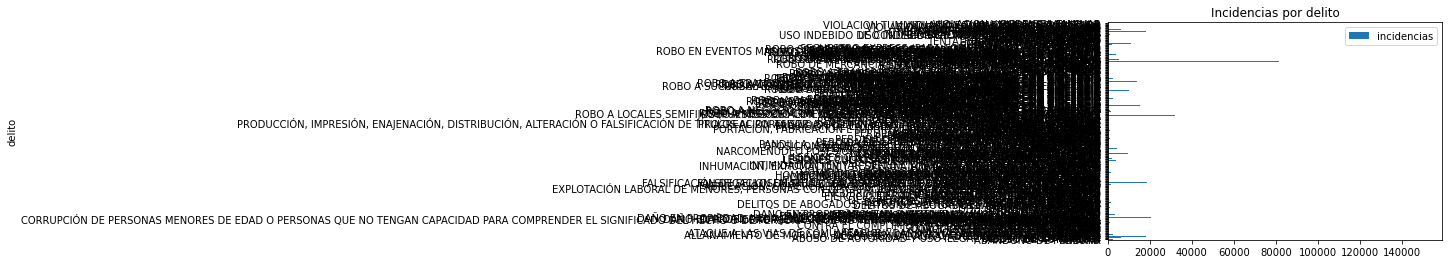

In [54]:
dfDelito.columns
dfDelito.plot(kind='barh', x='delito', title="Incidencias por delito");



Por lo que se obtiene el maximo y el minimo de incidencias 

In [68]:
maximo = dfDelito["incidencias"].max()
print(maximo)

218016


In [70]:
minimo = dfDelito["incidencias"].min()
print(minimo)

1


Se hace un filtrado para saber las alcaldias con menores y mayores incidencias

In [71]:
dfDelito[dfDelito["incidencias"] == minimo]

,alcaldia_hechos,incidencias
0,ABALA,1
5,ACATZINGO,1
9,ACONCHI,1
11,ACUAMANALA DE MIGUEL HIDALGO,1
12,ACULCO,1
...,...,...
562,ZAPOTLAN DE JUAREZ,1
563,ZAPOTLAN EL GRANDE,1
567,ZIMATLAN DE ALVAREZ,1
570,ZIRACUARETIRO,1


In [73]:
dfDelito[dfDelito["incidencias"] == maximo]

,alcaldia_hechos,incidencias
145,CUAUHTEMOC,218016


**4. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? ¿A qué crees que se deba?**

Por cada delito se tranformaria a variables numericas por cada clase de delito, lo que haria seria hacer un transformacion de la variable fecha_hechos donde agregaria una columna para saber el mes ( donde extraeria la parte de mes 1-12) ,  semana (1-4  donde calcularia el núm de semana del mes  1-4) , quincenas (1-2) y despues calcularia el coeficiente de correlacion respecto a la variable cantidad de incidencias vs mes y asi cada columna y asi saber si tienen relación 

**5.¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.** 

Se obtiene la cantidad de incidencias por alcaldia y por delito 

In [74]:
dfDelitoAlcadia = df.groupby(["alcaldia_hechos", "delito"], as_index=False)[["categoria_delito"]].count()
#dfDelito = df.groupby('delito',as_index=False).agg(['count'])
dfDelitoAlcadia = dfDelitoAlcadia.rename(columns={'categoria_delito': 'incidencias'})

dfDelitoAlcadia

,alcaldia_hechos,delito,incidencias
0,ABALA,DENUNCIA DE HECHOS,1
1,ACAMBARO,PRIVACION DE LA LIBERTAD PERSONAL,1
2,ACAMBARO,VIOLACION,1
3,ACAMBARO,VIOLENCIA FAMILIAR,1
4,ACAMBAY,ABUSO SEXUAL,1
...,...,...,...
7913,ZUMPANGO,SUSTRACCION DE MENORES,2
7914,ZUMPANGO,USURPACIÓN DE IDENTIDAD,2
7915,ZUMPANGO,VIOLACION,1
7916,ZUMPANGO,VIOLACION EQUIPARADA,1


Se obtiene el maximo y minimo de incidencias por alcaldia

In [89]:
dfDelitoAlcadiaMax = dfDelitoAlcadia.groupby(["alcaldia_hechos"], as_index=False)[["incidencias"]].max()

In [90]:
dfDelitoAlcadiaMax

,alcaldia_hechos,incidencias
0,ABALA,1
1,ACAMBARO,1
2,ACAMBAY,1
3,ACAPULCO DE JUAREZ,8
4,ACATLAN,1
...,...,...
569,ZINAPECUARO,1
570,ZIRACUARETIRO,1
571,ZITACUARO,1
572,ZITLALTEPEC DE TRINIDAD SANCHEZ SANTOS,1


In [91]:
dfDelitoAlcadiaMin = dfDelitoAlcadia.groupby(["alcaldia_hechos"], as_index=False)[["incidencias"]].min()

Despues se arma un conjunto con máximos y minimos

In [93]:
dfDelitofilter = pd.concat([dfDelitoAlcadiaMax,dfDelitoAlcadiaMin])

Se toma como ejemplo la alcaldia ZUMPANGO para verificar su maximo y minimo para despues ver que delitos fueron con mayor o menor frecuencia

In [101]:
dfDelitofilter[dfDelitofilter["alcaldia_hechos"] == "ZUMPANGO"]

,alcaldia_hechos,incidencias
573,ZUMPANGO,14
573,ZUMPANGO,1


Despues se hace un filtrado al conjunto dfDelitoAlcadia para obtener los delitos con mayor y menos frecuencia en un solo dataframe

In [100]:
dfAlcDelitosMayoresMenores = pd.merge(dfDelitoAlcadia, dfDelitofilter, how="inner", on=["alcaldia_hechos", "incidencias"])
dfAlcDelitosMayoresMenores[dfAlcDelitosMayoresMenores["alcaldia_hechos"] == "ZUMPANGO"]

,alcaldia_hechos,delito,incidencias
3642,ZUMPANGO,DENUNCIA DE HECHOS,1
3643,ZUMPANGO,DESPOJO,1
3644,ZUMPANGO,HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO),1
3645,ZUMPANGO,HOMICIDIO CULPOSO POR ARMA DE FUEGO,1
3646,ZUMPANGO,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLI...,1
3647,ZUMPANGO,INSOLVENCIA ALIMENTARIA,1
3648,ZUMPANGO,LESIONES CULPOSAS,1
3649,ZUMPANGO,LESIONES CULPOSAS POR CAIDA,1
3650,ZUMPANGO,LESIONES CULPOSAS POR TRANSITO VEHICULAR,1
3651,ZUMPANGO,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,1


**6. Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?**

Se puede hacer un indicador por colonia, calle de ahi agrupar por categoria de delito y asi saber mas a detalle que colonias, calle son las mas peligrosas y en que categoria estan las incidencias como de esta forma

In [106]:
dfDelitoCol = df.groupby(["colonia_hechos"], as_index=False)[["categoria_delito"]].count()
#dfDelito = df.groupby('delito',as_index=False).agg(['count'])
dfDelitoCol = dfDelitoCol.rename(columns={'categoria_delito': 'incidencias'})

SECCdfDelitoCol

,colonia_hechos,incidencias
0,10 DE ABRIL,147
1,10 DE MAYO,467
2,12 DE DICIEMBRE,197
3,15 DE AGOSTO,544
4,16 DE SEPTIEMBRE,332
...,...,...
1667,ZONA URBANA EJIDAL LOS REYES CULHUACAN,494
1668,ZONA URBANA EJIDAL SANTA MARIA AZTAHUACAN,2265
1669,ZONA URBANA EJIDAL SANTA MARIA TOMATLAN,268
1670,ÁLAMOS,5076


SECCION B
El costo por manterer la paleta en la maquina es $1 , $100 de transporte a la maquina (solo 1 vez al dia)

Yo penso que es un problema de optimización ya que necesitamos el mayor beneficio usando el minimo de recursos. 

Aunque tambien se puede utilizar algoritmos de regresion lineal para predecir el número de paletas que se pueden consumir al dia siguiente y asi saber cuantas paletas necesito como minimo por maquina.

Se identifican las variables a reducir que son 100 pesos por maquina y el costo total por maquina para mantener la paletas en refrigeración

Nuestro KPI es que no haya indisponibilidad de paletas menor al 2% al mes de esta forma sabemos si hubo respuesta positiva o negativa 